In [1]:
%cd /nfsd/sysbiobig/bazzaccoen/tangramlit_dev

/nfsd/sysbiobig/bazzaccoen/tangramlit_dev


In [2]:
import scanpy as sc
import squidpy as sq
import numpy as np 
import pandas as pd
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt

/nfsd/sysbiobig/bazzaccoen/tangramlit_dev/myvenv/lib64/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/nfsd/sysbiobig/bazzaccoen/tangramlit_dev/myvenv/lib64/python3.12/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/nfsd/sysbiobig/bazzaccoen/tangramlit_dev/myvenv/lib64/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text 

In [3]:
# Set data path
data_path = "/nfsd/sysbiobig/bazzaccoen/tangramlit_dev/data/Dataset9/"

# Data preparation

## SC data

#### Data reading

In [ ]:
# Load exon counts
exon = pd.read_csv(data_path + "mouse_VISp_2018-06-14/exon-matrix.csv", index_col=0)   # genes x cells

In [ ]:
# make sparse
from scipy import sparse
exon_sparse = sparse.csr_matrix(exon.values)

In [ ]:
exon_sparse.shape  # genes x cells

(45768, 15413)

In [8]:
# Load gene and sample info
genes = pd.read_csv(data_path + "mouse_VISp_2018-06-14/genes-rows.csv", index_col=0)
samples = pd.read_csv(data_path + "mouse_VISp_2018-06-14/samples-columns.csv", index_col=0)

In [17]:
samples.shape[0]

15413

In [13]:
genes.head()

,gene_id,chromosome,gene_entrez_id,gene_name
gene_symbol,,,,
0610005C13Rik,500717483,7,71661,RIKEN cDNA 0610005C13 gene
0610006L08Rik,500717917,7,76253,RIKEN cDNA 0610006L08 gene
0610007P14Rik,500730104,12,58520,RIKEN cDNA 0610007P14 gene
0610009B22Rik,500726890,11,66050,RIKEN cDNA 0610009B22 gene
0610009E02Rik,500702775,2,100125929,RIKEN cDNA 0610009E02 gene


In [12]:
samples.head()

,sample_id,sample_type,organism,donor,sex,age_days,eye_condition,genotype,driver_lines,reporter_lines,...,genes_detected_cpm_criterion,genes_detected_fpkm_criterion,tdt_cpm,gfp_cpm,class,subclass,cluster,confusion_score,cluster_correlation,core_intermediate_call
sample_name,,,,,,,,,,,,,,,,,,,,,
F1S4_160108_001_A01,527128530,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,Ai14(RCL-tdT),...,10445,9222,248.86,248.86,GABAergic,Vip,Vip Arhgap36 Hmcn1,0.4385,0.837229,Intermediate
F1S4_160108_001_B01,527128536,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,Ai14(RCL-tdT),...,11600,10370,289.61,289.61,GABAergic,Lamp5,Lamp5 Lsp1,0.1025,0.878743,Core
F1S4_160108_001_C01,527128542,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,Ai14(RCL-tdT),...,11848,10734,281.06,281.06,GABAergic,Lamp5,Lamp5 Lsp1,0.0195,0.887084,Core
F1S4_160108_001_D01,527128548,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,Ai14(RCL-tdT),...,9494,8561,390.02,390.02,GABAergic,Vip,Vip Crispld2 Htr2c,0.2734,0.843552,Core
F1S4_160108_001_E01,527128554,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,Ai14(RCL-tdT),...,10012,8791,253.92,253.92,GABAergic,Lamp5,Lamp5 Plch2 Dock5,0.7532,0.854994,Core


In [ ]:
# Build AnnData
adata_sc = sc.AnnData(X=exon_sparse.T, var=genes, obs=samples)
adata_sc

AnnData object with n_obs × n_vars = 15413 × 45768
    obs: 'sample_id', 'sample_type', 'organism', 'donor', 'sex', 'age_days', 'eye_condition', 'genotype', 'driver_lines', 'reporter_lines', 'brain_hemisphere', 'brain_region', 'brain_subregion', 'injection_label_direction', 'injection_primary', 'injection_secondary', 'injection_tract', 'injection_material', 'injection_exclusion_criterion', 'facs_date', 'facs_container', 'facs_sort_criteria', 'rna_amplification_set', 'library_prep_set', 'library_prep_avg_size_bp', 'seq_name', 'seq_tube', 'seq_batch', 'total_reads', 'percent_exon_reads', 'percent_intron_reads', 'percent_intergenic_reads', 'percent_rrna_reads', 'percent_mt_exon_reads', 'percent_reads_unique', 'percent_synth_reads', 'percent_ecoli_reads', 'percent_aligned_reads_total', 'complexity_cg', 'genes_detected_cpm_criterion', 'genes_detected_fpkm_criterion', 'tdt_cpm', 'gfp_cpm', 'class', 'subclass', 'cluster', 'confusion_score', 'cluster_correlation', 'core_intermediate_call'
    

In [9]:
adata_sc.obs.columns

Index(['sample_id', 'sample_type', 'organism', 'donor', 'sex', 'age_days',
       'eye_condition', 'genotype', 'driver_lines', 'reporter_lines',
       'brain_hemisphere', 'brain_region', 'brain_subregion',
       'injection_label_direction', 'injection_primary', 'injection_secondary',
       'injection_tract', 'injection_material',
       'injection_exclusion_criterion', 'facs_date', 'facs_container',
       'facs_sort_criteria', 'rna_amplification_set', 'library_prep_set',
       'library_prep_avg_size_bp', 'seq_name', 'seq_tube', 'seq_batch',
       'total_reads', 'percent_exon_reads', 'percent_intron_reads',
       'percent_intergenic_reads', 'percent_rrna_reads',
       'percent_mt_exon_reads', 'percent_reads_unique', 'percent_synth_reads',
       'percent_ecoli_reads', 'percent_aligned_reads_total', 'complexity_cg',
       'genes_detected_cpm_criterion', 'genes_detected_fpkm_criterion',
       'tdt_cpm', 'gfp_cpm', 'class', 'subclass', 'cluster', 'confusion_score',
       'cluste

Data contains a lot of annotated metadata.

#### Annotation
We quickly explore the available annotations:

In [6]:
print("scRNA classes: \n", adata_sc.obs['class'].unique())
print("scRNA subclasses: \n", adata_sc.obs['subclass'].unique())

scRNA classes: 
 ['GABAergic', 'Endothelial', 'No Class', 'Glutamatergic', 'Low Quality', 'Non-Neuronal']
Categories (6, object): ['Endothelial', 'GABAergic', 'Glutamatergic', 'Low Quality', 'No Class', 'Non-Neuronal']
scRNA subclasses: 
 ['Vip', 'Lamp5', 'Sst', 'Sncg', 'Serpinf1', ..., 'Low Quality', 'Doublet', 'VLMC', 'SMC', 'Batch Grouping']
Length: 28
Categories (28, object): ['Astro', 'Batch Grouping', 'CR', 'Doublet', ..., 'Sncg', 'Sst', 'VLMC', 'Vip']


#### Counts inspection

In [10]:
# Inspect basic stats
X = adata_sc.X
if not isinstance(X, np.ndarray):
    X = X.toarray()  # if sparse

pd.Series(X.ravel()).describe()

count    7.054222e+08
mean     3.394671e+01
std      3.007169e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.111650e+05
dtype: float64

Statistics suggest raw counts.

#### Filter empty/doublets
We empirically remove candidate empty droplets and doublets by filtering out the 5th and 95th percentiles of the total counts per cell distribution:

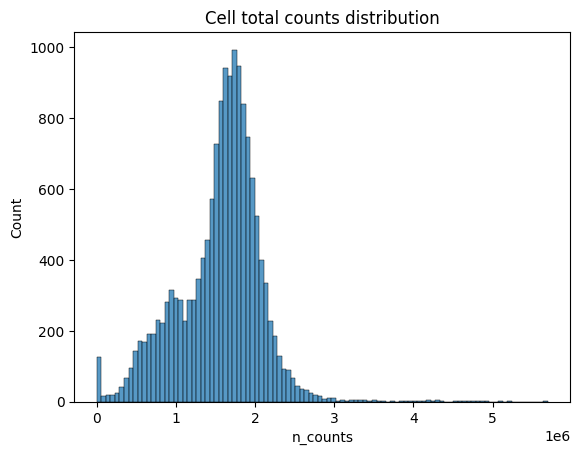

In [12]:
# compute n counts per cell
adata_sc.obs['n_counts'] = np.array(adata_sc.X.sum(axis=1)).ravel()
# plot distribution
sns.histplot(adata_sc.obs['n_counts'], bins=100)
plt.title('Cell total counts distribution')
plt.show()

This plot suggests that both doublets and empty cells have been removed.

#### Filter genes
The huge number of genes suggests dimensionality reduction.

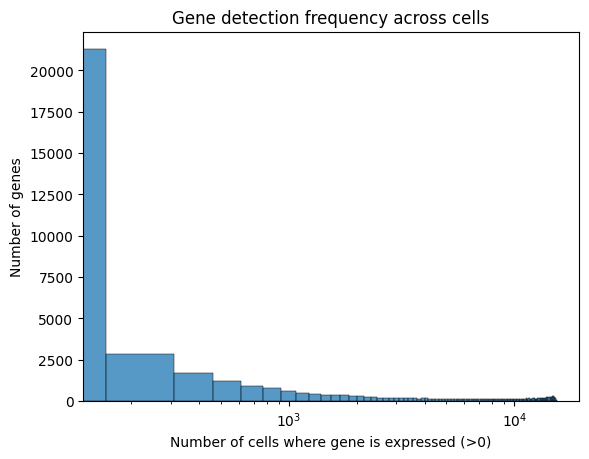

In [13]:
# compute counts if not already done
if 'n_cells_expressed' not in adata_sc.var.columns:
    adata_sc.var['n_cells_expressed'] = np.array((adata_sc.X > 0).sum(axis=0)).ravel()

# histogram (log scale on x is clearer)
sns.histplot(adata_sc.var['n_cells_expressed'], bins=100)
plt.xscale('log')
plt.xlabel('Number of cells where gene is expressed (>0)')
plt.ylabel('Number of genes')
plt.title('Gene detection frequency across cells')
plt.show()

In [15]:
# compute number of geans with 0, 1, 2, 3 min cells expressed
gene_detection_counts = {}
for min_cells in [0, 1, 2, 3, 4, 5, 6, 8, 10, 15, 20, 30, 50, 100, 200, 500]:
    n_genes = (adata_sc.var['n_cells_expressed'] >= min_cells).sum()
    gene_detection_counts[min_cells] = n_genes
    print(f"Number of genes detected in at least {min_cells} cells: {n_genes}")

Number of genes detected in at least 0 cells: 45768
Number of genes detected in at least 1 cells: 42094
Number of genes detected in at least 2 cells: 40242
Number of genes detected in at least 3 cells: 38905
Number of genes detected in at least 4 cells: 37858
Number of genes detected in at least 5 cells: 37056
Number of genes detected in at least 6 cells: 36409
Number of genes detected in at least 8 cells: 35399
Number of genes detected in at least 10 cells: 34617
Number of genes detected in at least 15 cells: 33132
Number of genes detected in at least 20 cells: 32090
Number of genes detected in at least 30 cells: 30672
Number of genes detected in at least 50 cells: 28841
Number of genes detected in at least 100 cells: 26205
Number of genes detected in at least 200 cells: 23477
Number of genes detected in at least 500 cells: 19619


Based on these number we filter on min=10:

In [16]:
sc.pp.filter_genes(adata_sc, min_cells=10)
adata_sc

AnnData object with n_obs × n_vars = 15413 × 34617
    obs: 'sample_id', 'sample_type', 'organism', 'donor', 'sex', 'age_days', 'eye_condition', 'genotype', 'driver_lines', 'reporter_lines', 'brain_hemisphere', 'brain_region', 'brain_subregion', 'injection_label_direction', 'injection_primary', 'injection_secondary', 'injection_tract', 'injection_material', 'injection_exclusion_criterion', 'facs_date', 'facs_container', 'facs_sort_criteria', 'rna_amplification_set', 'library_prep_set', 'library_prep_avg_size_bp', 'seq_name', 'seq_tube', 'seq_batch', 'total_reads', 'percent_exon_reads', 'percent_intron_reads', 'percent_intergenic_reads', 'percent_rrna_reads', 'percent_mt_exon_reads', 'percent_reads_unique', 'percent_synth_reads', 'percent_ecoli_reads', 'percent_aligned_reads_total', 'complexity_cg', 'genes_detected_cpm_criterion', 'genes_detected_fpkm_criterion', 'tdt_cpm', 'gfp_cpm', 'class', 'subclass', 'cluster', 'confusion_score', 'cluster_correlation', 'core_intermediate_call', 'n_

#### Normalization
CP10K and log1p:

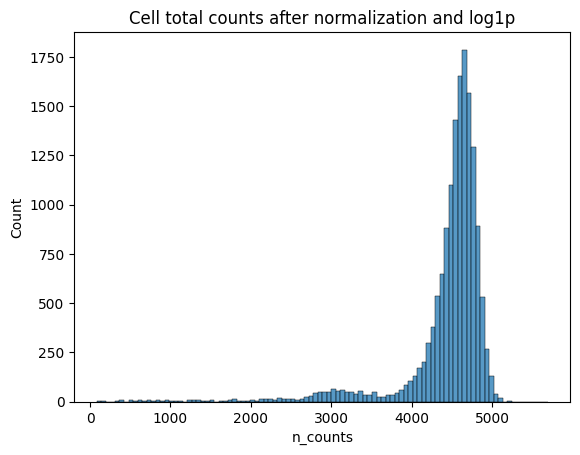

In [17]:
sc.pp.normalize_total(adata_sc, target_sum=1e4)
sc.pp.log1p(adata_sc)
# update counts
adata_sc.obs['n_counts'] = np.array(adata_sc.X.sum(axis=1)).ravel()

sns.histplot(adata_sc.obs['n_counts'], bins=100)
plt.title('Cell total counts after normalization and log1p')
plt.show()

#### Sparsity
Annotate total sparsity:

In [18]:
## add sparsity in uns
# handle sparse or dense automatically
X = adata_sc.X
if not isinstance(X, np.ndarray):
    X = X.copy()  # ensures .count_nonzero() works

# compute sparsity = fraction of zero entries
n_total = np.prod(adata_sc.shape)
n_nonzero = X.count_nonzero() if hasattr(X, "count_nonzero") else np.count_nonzero(X)
sparsity = 1 - (n_nonzero / n_total)

adata_sc.uns["sparsity"] = float(sparsity)
print(f"Sparsity: {sparsity:.4f}")

Sparsity: 0.7496


#### HVGs

In [19]:
sc.pp.highly_variable_genes(
    adata_sc,
    n_top_genes=2000,
    flavor='seurat_v3'
)
adata_sc

/nfsd/sysbiobig/bazzaccoen/tangramlit_dev/myvenv/lib64/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:73: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


AnnData object with n_obs × n_vars = 15413 × 34617
    obs: 'sample_id', 'sample_type', 'organism', 'donor', 'sex', 'age_days', 'eye_condition', 'genotype', 'driver_lines', 'reporter_lines', 'brain_hemisphere', 'brain_region', 'brain_subregion', 'injection_label_direction', 'injection_primary', 'injection_secondary', 'injection_tract', 'injection_material', 'injection_exclusion_criterion', 'facs_date', 'facs_container', 'facs_sort_criteria', 'rna_amplification_set', 'library_prep_set', 'library_prep_avg_size_bp', 'seq_name', 'seq_tube', 'seq_batch', 'total_reads', 'percent_exon_reads', 'percent_intron_reads', 'percent_intergenic_reads', 'percent_rrna_reads', 'percent_mt_exon_reads', 'percent_reads_unique', 'percent_synth_reads', 'percent_ecoli_reads', 'percent_aligned_reads_total', 'complexity_cg', 'genes_detected_cpm_criterion', 'genes_detected_fpkm_criterion', 'tdt_cpm', 'gfp_cpm', 'class', 'subclass', 'cluster', 'confusion_score', 'cluster_correlation', 'core_intermediate_call', 'n_

#### Save

In [20]:
# write
sc.write(filename=data_path + "scRNA_data.h5ad", adata=adata_sc, ext='h5ad')

## MERFISH data

#### Data reading

In [13]:
# Load counts
counts = pd.read_csv(data_path + "MERFISH_Allen_VISp/fixed_1001844875.csv")
counts = counts.iloc[:, 2:]  # keep only expression columns

In [46]:
counts.head()

,1700022I11Rik,1810046K07Rik,5031425F14Rik,5730522E02Rik,Acta2,Adam2,Adamts2,Adamts4,Adra1b,Alk,...,Vwc2,Wipf3,Wnt7b,Zfp804b,area,position,total_reads,simpleClass,x_um,y_um
0,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,170.10,[1161.11337076 6178.3830543 ],870,67,1161.113371,6178.383054
1,0,0,1,1,0,0,0,0,0,0,...,9,1,0,1,206.55,[1162.91337076 6113.1330543 ],454,233,1162.913371,6113.133054
2,0,0,0,1,0,0,0,0,0,0,...,1,2,0,0,184.68,[1168.31337076 6046.0830543 ],269,97,1168.313371,6046.083054
3,0,0,0,0,2,0,0,0,0,0,...,3,0,0,0,87.48,[1163.81337076 6202.6830543 ],340,105,1163.813371,6202.683054
4,0,0,0,1,0,0,0,2,0,0,...,4,3,0,1,155.52,[1166.96337076 6083.8830543 ],241,72,1166.963371,6083.883054


In [24]:
# separate meta and counts
meta_cols = ['area', 'position', 'total_reads', 'simpleClass', 'x_um', 'y_um']
expr = counts.drop(columns=meta_cols)
obs = counts[meta_cols]

In [15]:
# Load gene info
genes = pd.read_csv(data_path + "MERFISH_Allen_VISp/MERFISH_genes.csv", index_col=0)
genes.head()

,gene
0,1700022I11Rik
1,1810046K07Rik
2,5031425F14Rik
3,5730522E02Rik
4,Acta2


In [112]:
genes.shape

(254, 1)

In [25]:
# get genes shared between gene df and counts columns
shared_genes = set(genes['gene']).intersection(counts.columns)
print(genes.shape[0] == len(shared_genes))  # all genes are in the cols


True


In [26]:
diff_cols = []
for col in counts.columns:
    if col not in shared_genes:
        diff_cols.append(col)
print(f"Other columns = {len(diff_cols)} : \n {diff_cols}")

Other columns = 20 : 
 ['Blank-1', 'Blank-10', 'Blank-2', 'Blank-3', 'Blank-4', 'Blank-5', 'Blank-6', 'Blank-7', 'Blank-8', 'Blank-9', 'Cd52', 'Igfbp6', 'Mup5', 'Rprml', 'area', 'position', 'total_reads', 'simpleClass', 'x_um', 'y_um']


We see that there are blank names, a few genes and the metadata already split, we remove the remaining from the expression dataframe:

In [27]:
expr = counts.drop(columns=diff_cols)
expr.shape

(2399, 254)

In [28]:
# Convert counts to sparse
from scipy import sparse
X = sparse.csr_matrix(expr.values)
X.shape

(2399, 254)

In [29]:
# Load spot data
spots_meta = pd.read_csv(data_path + "MERFISH_Allen_VISp/Allen_MERFISH_spots_with_anatomy.csv")
spots_meta = spots_meta.iloc[:, 2:]
print(spots_meta.shape)
spots_meta.head()


(3841412, 5)


,x_um,y_um,gene,depth_um,layer
0,1278.683956,6020.642260,Gad2,1445.701599,outside_VISp
1,1326.970330,6023.884788,Gad2,1403.168094,outside_VISp
2,1292.026844,6059.337093,Gad2,1413.731426,outside_VISp
3,1300.886241,6097.786264,Gad2,1385.680938,outside_VISp
4,1232.410068,6102.884182,Gad2,1440.812721,outside_VISp


This file contains single molecule/transcript information (3841412 rows).

In [ ]:
# Build AnnData
adata_st = sc.AnnData(X=X, obs=obs, var=genes)
adata_st.var_names = genes["gene"]
adata_st.obsm['spatial'] = adata_st.obs[['x_um', 'y_um']]
adata_st

AnnData object with n_obs × n_vars = 2399 × 254
    obs: 'area', 'position', 'total_reads', 'simpleClass', 'x_um', 'y_um'
    var: 'gene'
    obsm: 'spatial'

The orginal counts matrix matches the benchmarking paper data, but if we want to maintain only correctly named genes (exlude proxies and mismatched) we have to loose some of them: from $268$ to $254$. The genes file likely lists only targeted biological genes, while the count matrix includes both genes and control probes.

#### Spatial scatter plot

In [24]:
adata_st.obs['simpleClass'].unique()

array([ 67, 233,  97, 105,  72, 225, 193,  73, 227, 235, 107,  64, 104,
        75,   0,  96,  74,  99,   8, 106,  98,  32,  65,  10, 200,  66,
       224, 232, 234, 109, 192,  41, 201, 203, 195, 202,   3, 111,  11])

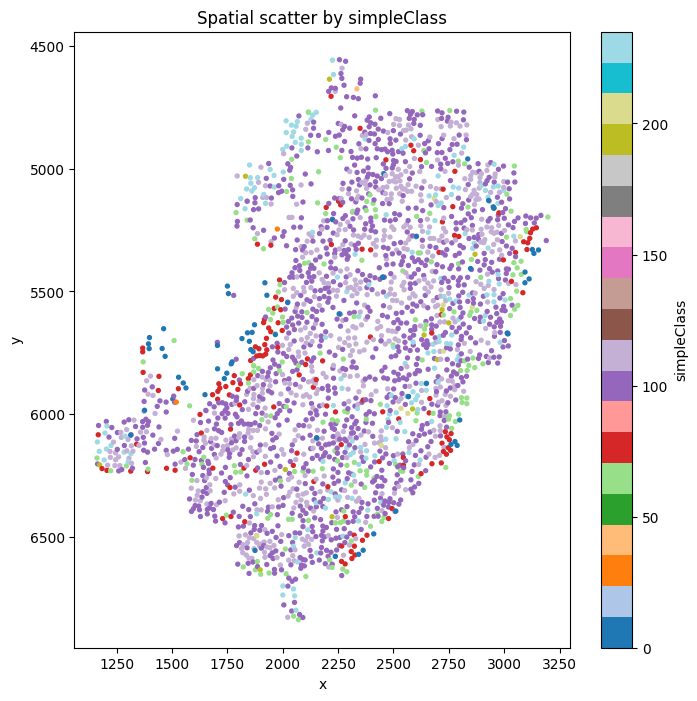

In [25]:
x = adata_st.obs['x_um']
y = adata_st.obs['y_um']
if adata_st.obs['simpleClass'].dtype.name == 'category':
    c = adata_st.obs['simpleClass'].cat.codes
else:
    c = adata_st.obs['simpleClass']

plt.figure(figsize=(8,8))
plt.scatter(x, y, c=c, cmap='tab20', s=8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Spatial scatter by simpleClass')
plt.gca().invert_yaxis()
plt.colorbar(label='simpleClass')
plt.show()


'simpleClass' might be a cluster ID that maps to an annotation, but we dould not retrieve it.

#### Count format inspection

In [26]:
# Inspect basic stats
X = adata_st.X
if not isinstance(X, np.ndarray):
    X = X.toarray()  # if sparse

pd.Series(X.ravel()).describe()

count    609346.000000
mean          3.325236
std          35.823220
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        6540.000000
dtype: float64

In [27]:
# Check if all values are integers
is_integer = np.allclose(X, np.round(X))
print("All integer values:", is_integer)

All integer values: True


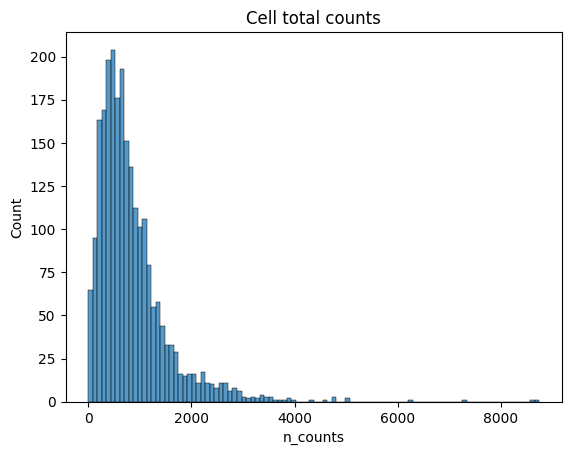

In [28]:
# compute n counts per spot
adata_st.obs['n_counts'] = np.array(adata_st.X.sum(axis=1)).ravel()
sns.histplot(adata_st.obs['n_counts'], bins=100)
plt.title('Cell total counts')
plt.show()

Counts are raw, but the distribution is well shaped so we do not process it.

#### Normalization

/nfsd/sysbiobig/bazzaccoen/tangramlit_dev/myvenv/lib64/python3.12/site-packages/scanpy/preprocessing/_normalization.py:243: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


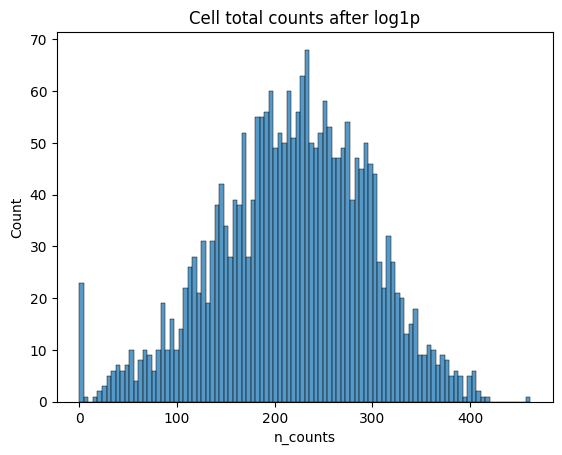

In [33]:
sc.pp.normalize_total(adata_st, target_sum=1e4)
sc.pp.log1p(adata_st)
# update counts 
adata_st.obs['n_counts'] = np.array(adata_st.X.sum(axis=1)).ravel()
# plot distribution again
sns.histplot(adata_st.obs['n_counts'], bins=100)
plt.title('Cell total counts after log1p')
plt.show()  

From the plot it is not clear if such transformations are significantly beneficial, but for consistency with Tangram guidlines we normalize.

#### Sparsity 

In [34]:
X = adata_st.X
if not isinstance(X, np.ndarray):
    X = X.copy()  # ensures .count_nonzero() works

# compute sparsity = fraction of zero entries
n_total = np.prod(adata_st.shape)
n_nonzero = X.count_nonzero() if hasattr(X, "count_nonzero") else np.count_nonzero(X)
sparsity = 1 - (n_nonzero / n_total)

adata_st.uns["sparsity"] = float(sparsity)
print(f"Sparsity: {sparsity:.4f}")

Sparsity: 0.7497


#### Spatial graph

In [35]:
sq.gr.spatial_neighbors(
    adata_st,
    coord_type='generic',   # 'visium' for Visium, 'generic' for single-cell resolution
    n_neighs=6,   
    set_diag=False,           # or adjust based on local cell density
    key_added="spatial"
)
adata_st

AnnData object with n_obs × n_vars = 2399 × 254
    obs: 'area', 'position', 'total_reads', 'simpleClass', 'x_um', 'y_um', 'n_counts'
    var: 'gene'
    uns: 'log1p', 'sparsity', 'spatial_neighbors'
    obsm: 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'

#### SA statistics

In [36]:
# Moran’s I
sq.gr.spatial_autocorr(
    adata_st,
    connectivity_key="spatial_connectivities",
    mode="moran",
    transformation=True,
    show_progress_bar=True,
)

# Geary’s C
sq.gr.spatial_autocorr(
    adata_st,
    connectivity_key="spatial_connectivities",
    mode="geary",
    transformation=True,
    show_progress_bar=True,
)
adata_st

AnnData object with n_obs × n_vars = 2399 × 254
    obs: 'area', 'position', 'total_reads', 'simpleClass', 'x_um', 'y_um', 'n_counts'
    var: 'gene'
    uns: 'log1p', 'sparsity', 'spatial_neighbors', 'moranI', 'gearyC'
    obsm: 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'

#### Save

In [37]:
# write
sc.write(filename=data_path + "MERFISH_data.h5ad", adata=adata_st, ext='h5ad')